In [14]:
import pandas as pd
import ast
import numpy as np
import dotabet

input_file = r"D:\WORKSPACE\dotabet\data\top_teams\features.csv"

df= pd.read_csv(input_file)

team_ids_to_include = [8255888, 8261500,8599101,9247354,36,8382433,39,2163,2586976,8291895,1838315,7119388,8724984,9255039,8574561,5,9303484]
df = df[df['dire_team_id'].isin(team_ids_to_include) & df['radiant_team_id'].isin(team_ids_to_include)]

assert all(df['missing_data'] == 0), "Missing data present!"
df = df.drop(['missing_data', 'league_name', 'dire_name', 'radiant_name', 'dire_team_id', 'radiant_team_id', 'match_id', 'game_mode',\
        'leagueid', 'start_time', 'hero_id' ], axis=1)

In [3]:
string_agg = lambda x: x.mode().iloc[0]

num_cols = df.select_dtypes(include=['int', 'float']).columns
str_cols = df.select_dtypes(include=['object']).columns

agg_dict = {col: 'mean' for col in num_cols}
agg_dict.update({col: string_agg for col in str_cols})

dfgroup = df.groupby('account_id')
df = dfgroup.agg(agg_dict)

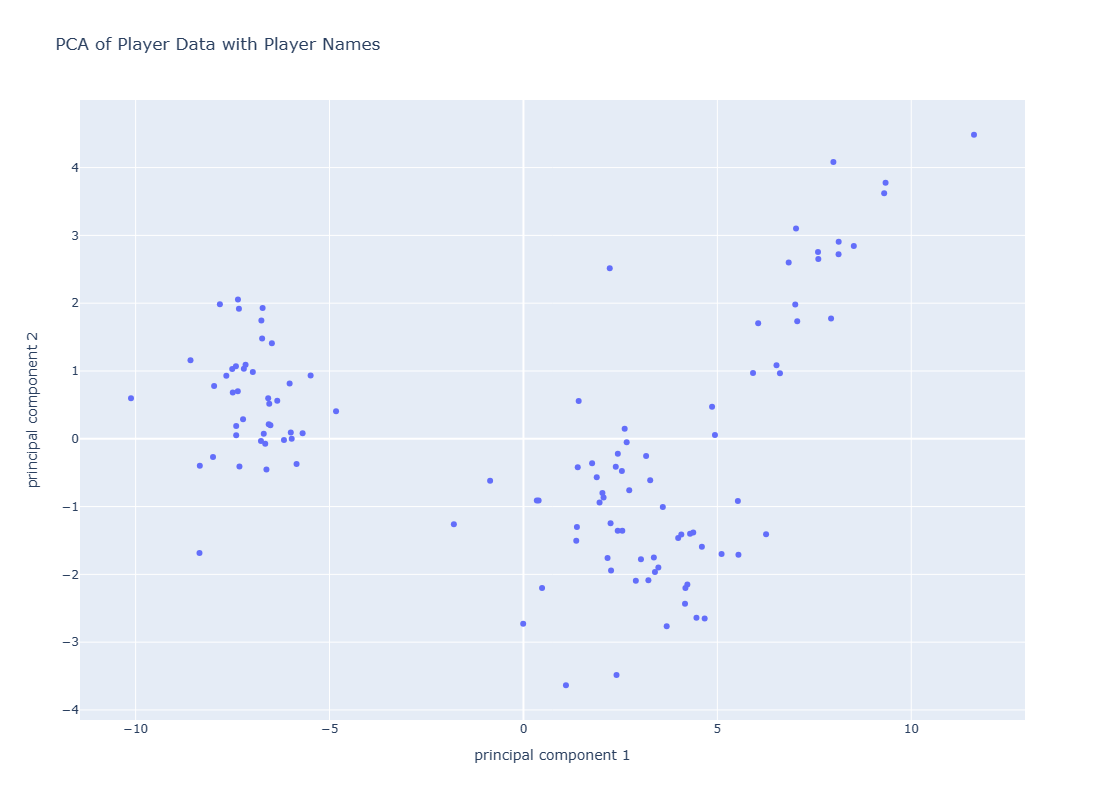

In [9]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Separating out the features
features = df.drop(['player_name'], axis=1)
# Standardizing the features
features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

# Convert the principal components into a DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Add back the player_name for labeling purposes
principalDf['player_name'] = df['player_name'].values

# Using Plotly for an interactive scatter plot
fig = px.scatter(principalDf, x='principal component 1', y='principal component 2',
                 hover_name='player_name',
                 title='PCA of Player Data with Player Names')

# Adjust the figure size
fig.update_layout(width=1000, height=800)  # Adjust the size as needed

# Hide the player_name from being constantly displayed
fig.update_traces(textposition='top center', mode='markers')

fig.show()


[t-SNE] Computing 114 nearest neighbors...
[t-SNE] Indexed 115 samples in 0.000s...
[t-SNE] Computed neighbors for 115 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 115 / 115
[t-SNE] Mean sigma: 3.576741
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.946583
[t-SNE] KL divergence after 300 iterations: 0.086231


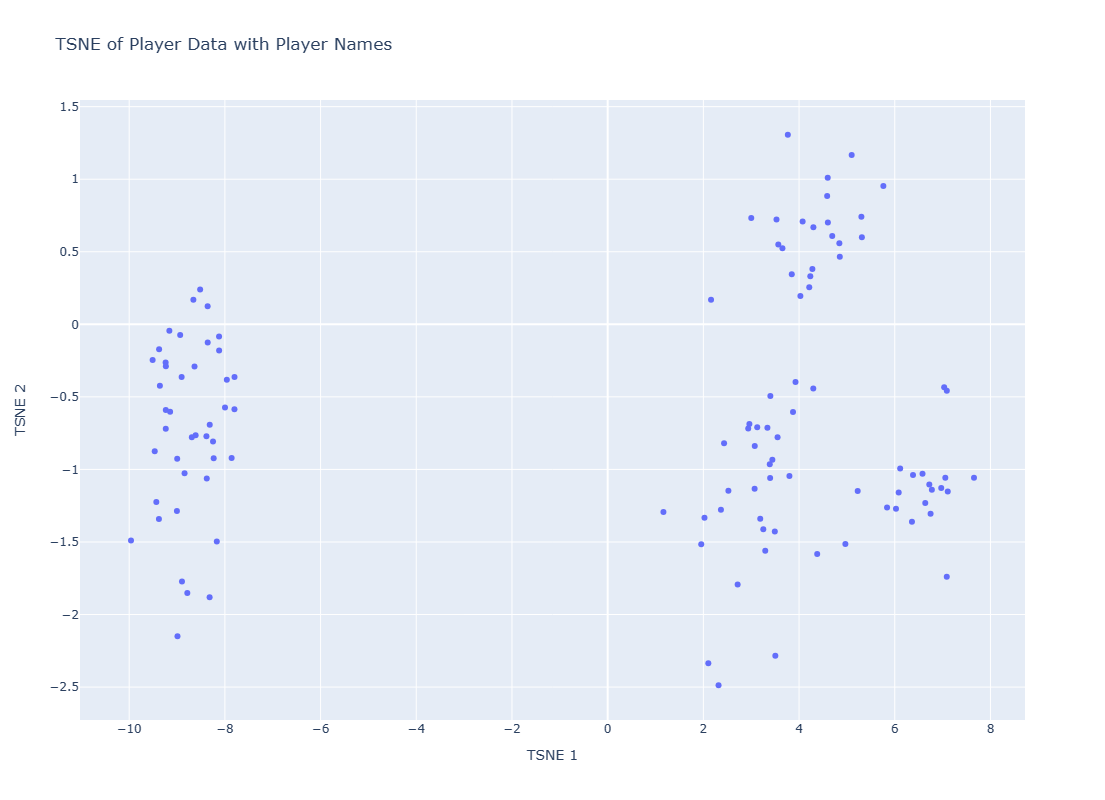

In [13]:
from sklearn.manifold import TSNE

# We'll use the already standardized features from the PCA example
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)

tsneDf = pd.DataFrame(data=tsne_results, columns=['TSNE 1', 'TSNE 2'])

tsneDf['player_name'] = df['player_name'].values

# Using Plotly for an interactive scatter plot
fig = px.scatter(tsneDf, x='TSNE 1', y='TSNE 2',
                 hover_name='player_name',
                 title='TSNE of Player Data with Player Names')

# Adjust the figure size
fig.update_layout(width=1000, height=800)  # Adjust the size as needed

# Hide the player_name from being constantly displayed
fig.update_traces(textposition='top center', mode='markers')

fig.show()